<a href="https://colab.research.google.com/github/hosein-jamshidian/Persian-Traffic-Sign-Recognition/blob/main/deep_pro_hosein_akharishe_dige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data with Kaggle API

In [ ]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hoseinjamshidian","key":"61bab76c60c9734930d5c064c03687e4"}'}

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Creating directory and changing the current working directory
!mkdir persian_traffic_sign_dataset
%cd persian_traffic_sign_dataset

/content/persian_traffic_sign_dataset


In [ ]:
# Searching for dataset
!kaggle datasets list -s persian-traffic-sign-dataset-ptsd

ref                                                 title                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  -----------------------------------  -----  -------------------  -------------  ---------  ---------------  
saraparsaseresht/persian-traffic-sign-dataset-ptsd  Persian Traffic Sign Dataset (PTSD)  544MB  2021-11-19 13:52:40            400         14  0.8235294        


In [ ]:
# Downloading dataset and coming out of directory
!kaggle datasets download saraparsaseresht/persian-traffic-sign-dataset-ptsd
%cd ..

 99% 538M/544M [00:07<00:00, 70.2MB/s]
100% 544M/544M [00:07<00:00, 76.4MB/s]
/content


In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip persian_traffic_sign_dataset/persian-traffic-sign-dataset-ptsd.zip -d persian_traffic_sign_dataset
!rm persian_traffic_sign_dataset/persian-traffic-sign-dataset-ptsd.zip
!rm -rf persian_traffic_sign_dataset/PTSD.txt

Streaming output truncated to the last 5000 lines.
  inflating: persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train/31_Roundabouts/31_00289.jpg  
  inflating: persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train/31_Roundabouts/31_00290.jpg  
  inflating: persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train/31_Roundabouts/31_00291.jpg  
  inflating: persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train/31_Roundabouts/31_00292.jpg  
  inflating: persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train/31_Roundabouts/31_00293.jpg  
  inflating: persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train/31_Roundabouts/31_00294.jpg  
  inflating: persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train/31_Roundabouts/31_00295.jpg  
  inflating: persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train/31_Roundabouts/31_00296.jpg  
  inflating: persian_traffic_sign_dataset/PTSD_Recogn

# Importing Libraries

In [ ]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

# 16 Random Persian Traffic Signs

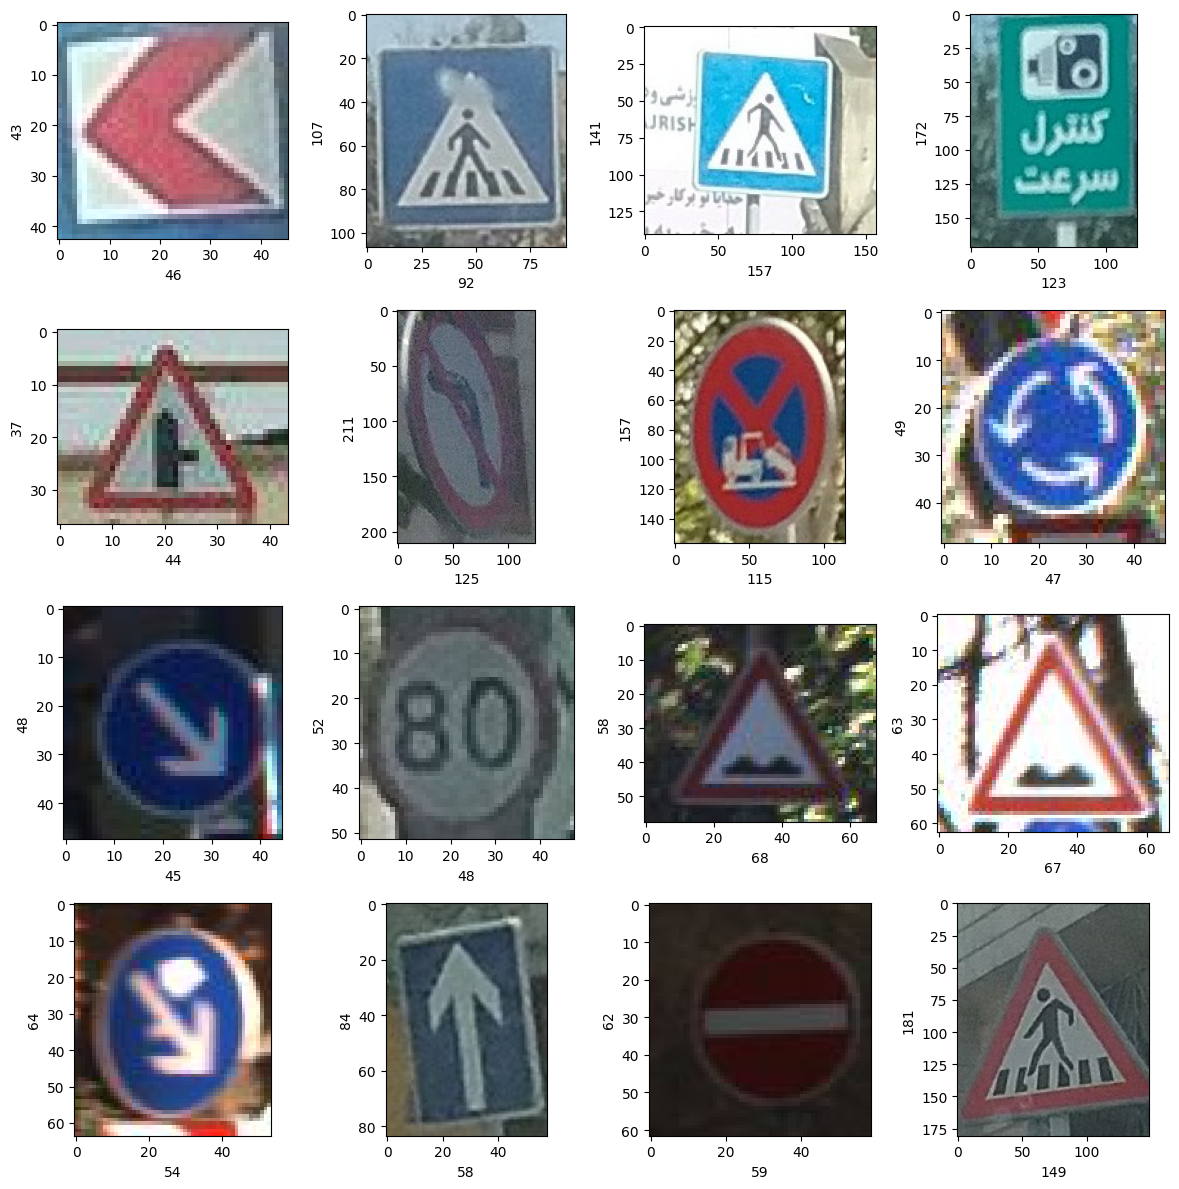

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

# All 43 Classes from Train Folder

In [ ]:
train_folder_names_list='''0_Compulsory Keep BothSide`10_Maximum Speed 30`11_Maximum Speed 40`12_Maximum Speed 50`13_Maximum Speed 60`14_Maximum Speed 70`15_Maximum Speed 80`16_Maximum Speed 90`17_MotorCycle Prohibited`18_No Entry`19_No Horn`1_Compulsory Keep Left`20_NO Stopping`21_NO Waiting`22_One way Traffic`23_Park`24_Park Forbidden`25_Pedestrain`26_Pedestrian crossing`27_Right Bend`28_Right Margin`29_Right Turn Prohibited`2_Compulsory Keep Right`30_Road Work`31_Roundabouts`32_School`33_School Crossing`34_Side Road Right`35_Slow`36_Speed Camera`37_STOP`38_Truck Prohibited`39_Two Way Traffic`3_Cycle crossing`40_U-Turn`41_U-Turn Allowed`42_U-turn Prohibited`4_Danger`5_Give Way`6_Hump`7_Left Bend`8_Left Margin`9_Left Turn Prohibited'''.split('`')

In [ ]:
len(train_folder_names_list)

43

## Convert Classes To a Dictionary

In [ ]:
dict_train_id_label={n.split('_')[0]:n.split('_')[1]for n in train_folder_names_list}

## Sorting Dictionary based on Keys

In [ ]:
keys = list(dict_train_id_label.keys())
keys=[int(k) for k in keys]
keys.sort()
sorted_dict = {i: dict_train_id_label[f'{i}'] for i in keys}

print(sorted_dict)

{0: 'Compulsory Keep BothSide', 1: 'Compulsory Keep Left', 2: 'Compulsory Keep Right', 3: 'Cycle crossing', 4: 'Danger', 5: 'Give Way', 6: 'Hump', 7: 'Left Bend', 8: 'Left Margin', 9: 'Left Turn Prohibited', 10: 'Maximum Speed 30', 11: 'Maximum Speed 40', 12: 'Maximum Speed 50', 13: 'Maximum Speed 60', 14: 'Maximum Speed 70', 15: 'Maximum Speed 80', 16: 'Maximum Speed 90', 17: 'MotorCycle Prohibited', 18: 'No Entry', 19: 'No Horn', 20: 'NO Stopping', 21: 'NO Waiting', 22: 'One way Traffic', 23: 'Park', 24: 'Park Forbidden', 25: 'Pedestrain', 26: 'Pedestrian crossing', 27: 'Right Bend', 28: 'Right Margin', 29: 'Right Turn Prohibited', 30: 'Road Work', 31: 'Roundabouts', 32: 'School', 33: 'School Crossing', 34: 'Side Road Right', 35: 'Slow', 36: 'Speed Camera', 37: 'STOP', 38: 'Truck Prohibited', 39: 'Two Way Traffic', 40: 'U-Turn', 41: 'U-Turn Allowed', 42: 'U-turn Prohibited'}


#Calculate Dimensions of all train images

In [ ]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for name in train_folder_names_list:
    labels = 'persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train' + f'/{name}'
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

## Mean of Dimentions

In [ ]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  252.95355779243317  Dimension 2 Mean :  222.9482124262409


# Reshape the train images

In [ ]:
# Now we will reshape the images to (220,220)
images = []
label_id = []

for name in train_folder_names_list:
  labels = 'persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train' + f'/{name}'
  image_path = os.listdir(labels)
  for x in image_path:
      img = Image.open(labels + '/' + x)
      img = img.resize((50,50))
      img = np.array(img)
      images.append(img)
      label_id.append(int(name.split('_')[0]))

#### checking for all file in Train directory is a jpg file

In [ ]:
# for name in train_folder_names_list:
#   labels = 'persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/train' + f'/{name}'
#   image_path = os.listdir(labels)
#   for x in image_path:
#     if x.split('.')[1] !='jpg':
#       print(f'oh shit {name} and {x}')

# Normalization

In [ ]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

In [ ]:
label_id = np.array(label_id)
label_id.shape

(14405,)

In [ ]:
images.shape

(14405, 50, 50, 3)

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head(10)

20    1075
25    1014
18     930
2      703
22     684
3      662
0      573
28     506
31     497
10     477
dtype: int64

In [ ]:
(len(images)*80)/100

11524.0

#Train Test Split

In [ ]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 101)

In [ ]:
x_train.shape

(11524, 50, 50, 3)

# Convert for each labels to one-hot encoder vector

In [ ]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# CNN Modeling

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

## Train Model

In [ ]:
model.fit(x_train, y_train, epochs = 15, batch_size =128 , validation_data = (x_val, y_val), verbose = 1)


Epoch 1/15
91/91 [==============================] - 110s 1s/step - loss: 2.7627 - accuracy: 0.2828 - val_loss: 1.6355 - val_accuracy: 0.6394
Epoch 2/15
91/91 [==============================] - 93s 1s/step - loss: 1.4630 - accuracy: 0.6059 - val_loss: 0.9822 - val_accuracy: 0.7772
Epoch 3/15
91/91 [==============================] - 104s 1s/step - loss: 1.0965 - accuracy: 0.6900 - val_loss: 0.6948 - val_accuracy: 0.8282
Epoch 4/15
91/91 [==============================] - 92s 1s/step - loss: 0.8426 - accuracy: 0.7546 - val_loss: 0.5637 - val_accuracy: 0.8660
Epoch 5/15
91/91 [==============================] - 92s 1s/step - loss: 0.7079 - accuracy: 0.7906 - val_loss: 0.4158 - val_accuracy: 0.9108
Epoch 6/15
91/91 [==============================] - 91s 1s/step - loss: 0.5998 - accuracy: 0.8234 - val_loss: 0.3484 - val_accuracy: 0.9219
Epoch 7/15
91/91 [==============================] - 92s 1s/step - loss: 0.5393 - accuracy: 0.8417 - val_loss: 0.2948 - val_accuracy: 0.9309
Epoch 8/15
91/91 [

## Evaluation

<Axes: >

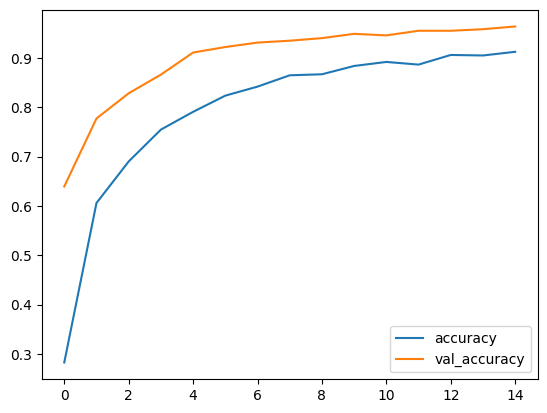

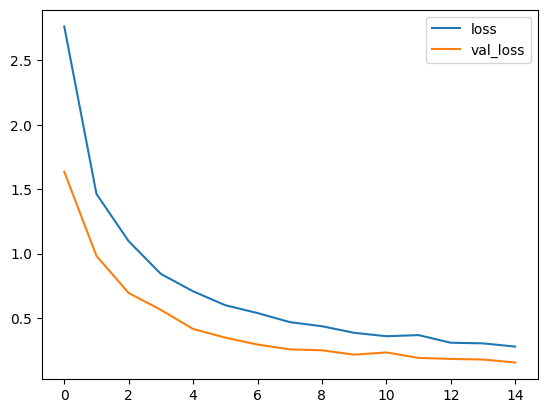

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

#### checking for all file in Test directory is a jpg file

In [ ]:
test_path = 'persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/test'
image_path = os.listdir(test_path)
for x in image_path:
  if x.split('.')[1] !='jpg':
    print(f'we have some file with type ({x.split(".")[1]}) with names : {x}')

# Creat Function For Scaling The Test Images

In [ ]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [ ]:
test_path = 'persian_traffic_sign_dataset/PTSD_Recognition/PTSD_Recognition/test'

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

## Import Test True Labels From a Csv File

In [ ]:
test = pd.read_csv('/content/testset_CSV.csv')
## clean one
test['species']=test['species'].replace('NO Waitin','NO Waiting')

# Add class_id Feature To Test DataFrame

In [ ]:
with open('/content/persian_species.txt') as file :
  f_s=file.read().split('\n')

farsi_list={int(w.split(":")[0]):w.split(":")[1][1:-1]  for w in f_s}

In [ ]:
class_id=[]
farsi_species=[]

for name in test['species']:

  for key in dict_train_id_label:

    if dict_train_id_label[key]==name :
      class_id.append(int(key))
      farsi_species.append(farsi_list[int(key)])


test['class_id']=class_id
test['farsi_species']=farsi_species

In [ ]:
test.head()

,file,species,class_id,farsi_species
0,00001.jpg,Park,23,پارکینگ
1,00002.jpg,U-Turn Allowed,41,دور زدن مجاز
2,00003.jpg,Compulsory Keep BothSide,0,عبور از هر دو سمت مجاز
3,00004.jpg,One way Traffic,22,راه یک طرفه
4,00005.jpg,Left Margin,8,حاشیه به چپ


In [ ]:
y_test = test['class_id'].values
y_test

array([23, 41,  0, ..., 21, 35, 42])

# Prediction

In [ ]:
y_pred=model.predict(test_images)
y_classes=np.argmax(y_pred,axis=1)

76/76 [==============================] - 4s 46ms/step


## List of All Persian Traffic Sign

In [ ]:
all_labels=[]
all_persian_labels=[]

for key in sorted_dict:
  all_labels.append(sorted_dict[key])
  all_persian_labels.append(farsi_list[key])

## Visualize and Predict Some Sample From Test Images

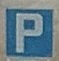

In [ ]:
# Visualize test image
img = Image.open(test_path + '/PTSD_00001.jpg')
img

In [ ]:
# Original label
print("Original label : ",all_labels[y_test[0]])
print("Pesian Original label : ",all_persian_labels[y_test[0]])

Original label :  Park
Pesian Original label :  پارکینگ


In [ ]:
# Predicted label
print("Predicted label : ",all_labels[y_classes[0]])
print("Pesian Predicted label : ",all_persian_labels[y_classes[0]])

Predicted label :  Park
Pesian Predicted label :  پارکینگ


## Example 2

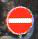

In [ ]:
img_2 = Image.open(test_path + '/PTSD_00692.jpg')
img_2

In [ ]:
# Original label
print("Original label : ",all_labels[y_test[691]])
print("Pesian Original label : ",all_persian_labels[y_test[691]])

Original label :  No Entry
Pesian Original label :  ورود ممنوع


In [ ]:
# Predicted label
print("Predicted label : ",all_labels[y_classes[691]])
print("Pesian Predicted label : ",all_persian_labels[y_classes[691]])

Predicted label :  No Entry
Pesian Predicted label :  ورود ممنوع
